# 参考

[言語処理100本ノック 2020 第6章: 機械学習](https://qiita.com/nymwa/items/774ca6c542c1eaff160d)

In [1]:
with open('./NewsAggregatorDataset/newsCorpora.csv') as f:
    data = f.read()
    
data = data.splitlines()
data = [line.split('\t') for line in data]

In [2]:
data[:2]

[['1',
  'Fed official says weak data caused by weather, should not slow taper',
  'http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\\?track=rss',
  'Los Angeles Times',
  'b',
  'ddUyU0VZz0BRneMioxUPQVP6sIxvM',
  'www.latimes.com',
  '1394470370698'],
 ['2',
  "Fed's Charles Plosser sees high bar for change in pace of tapering",
  'http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html',
  'Livemint',
  'b',
  'ddUyU0VZz0BRneMioxUPQVP6sIxvM',
  'www.livemint.com',
  '1394470371207']]

50

In [3]:
import random
random.seed(0)

In [4]:
publisher = [
    "Reuters",
    "Huffington Post",
    "Businessweek", 
    "Contactmusic.com", 
    "Daily Mail"
]

article = [
    article for article in data
    if article[3] in publisher
]
article[10]

['64',
 "EBay CEO Donahoe's Pay Drops by 53% to $13.8 Million for 2013",
 'http://www.businessweek.com/news/2014-03-10/ebay-ceo-donahoe-s-pay-drops-by-53-percent-to-13-dot-8-million-for-2013',
 'Businessweek',
 'b',
 'dxyGGb4iN9Cs9aMZTKQpJeoiQfruM',
 'www.businessweek.com',
 '1394470923237']

In [5]:
random.shuffle(article)
article[10]

['276048',
 'FOREX- Euro pinned near four-month lows as ECB looms',
 'http://in.reuters.com/article/2014/06/04/markets-forex-idINL3N0OL4OA20140604',
 'Reuters',
 'b',
 'd84jnxHjQNm9acMpm2areNmDtrR_M',
 'in.reuters.com',
 '1401950103350']

In [6]:
article = [[a[4], a[1]] for a in article]

In [7]:
n = len(article)
train_end = int(n * 0.8)
valid_end = int(n * 0.9)
train = article[:train_end]
valid = article[train_end:valid_end]
test = article[valid_end:]
len(train), len(valid), len(test)

(10684, 1336, 1336)

In [8]:
def write_txt(filename, data):
    with open('./{}.txt'.format(filename), 'w') as f:
        for a in data:
            f.writelines("\t".join(a)+'\n')

write_txt("train", train)
write_txt("valid", valid)
write_txt("test", test)
    

In [9]:
from collections import Counter
from tabulate import tabulate

In [10]:
categories = ['b', 't', 'e', 'm']
category_names = ['business', 'science and technology', 'entertainment', 'health']

In [11]:
table = [
    [name] + [freqs[cat] for cat in categories ]
    for name, freqs in [
        ('train',  Counter([cat for cat, _ in train])),
        ('valid',  Counter([cat for cat, _ in valid])),
        ('test',  Counter([cat for cat, _ in test]))
    ]
]
print(tabulate(table, headers=categories))

          b     t     e    m
-----  ----  ----  ----  ---
train  4557  1203  4180  744
valid   543   159   542   92
test    527   163   572   74


51

In [12]:
import re
import spacy
import nltk
import numpy as np

In [13]:
nlp = spacy.load('en')
stemmer = nltk.stem.snowball.SnowballStemmer(language='english')

In [14]:
def tokenize(x):
    x = re.sub(r'\s+', ' ', x)
    x = nlp.make_doc(x) # nlp(x)は遅い tokenizer以外も走るので
    x = [stemmer.stem(doc.lemma_.lower()) for doc in x]
    return x

In [15]:
tokenized_train = [[cat, tokenize(line)] for cat, line in train]
tokenized_valid = [[cat, tokenize(line)] for cat, line in valid]
tokenized_test = [[cat, tokenize(line)] for cat, line in test]

In [16]:
counter = Counter([
    token
    for _, tokens in tokenized_train
    for token in tokens
])
counter.most_common()

[('-', 3318),
 ("'", 3094),
 ('to', 2840),
 ('have', 2158),
 (',', 2125),
 ('...', 2036),
 ('in', 1916),
 ('a', 1876),
 ('the', 1558),
 ('of', 1466),
 ('for', 1365),
 ('on', 1359),
 ('updat', 1095),
 (':', 1076),
 ('and', 949),
 ('us', 911),
 ('be', 791),
 ('with', 750),
 ('at', 683),
 ('after', 591),
 ('new', 538),
 ('$', 502),
 ('"', 500),
 ('say', 446),
 ('stock', 444),
 ('(', 419),
 (')', 411),
 ('not', 385),
 ('up', 378),
 ('is', 376),
 ('from', 375),
 ('by', 345),
 ('?', 325),
 ('kardashian', 295),
 ('rise', 287),
 (';', 286),
 ('it', 271),
 ('china', 266),
 ('over', 265),
 ('share', 263),
 ('her', 262),
 ('high', 259),
 ('will', 258),
 ('kim', 251),
 ('euro', 248),
 ('show', 237),
 ('fall', 235),
 ('low', 232),
 ('1', 232),
 ('bank', 221),
 ('about', 218),
 ('2', 217),
 ('-pron-', 217),
 ('rate', 215),
 ('market', 212),
 ('year', 208),
 ('sale', 207),
 ('deal', 207),
 ('!', 205),
 ('can', 203),
 ('fed', 202),
 ('star', 200),
 ('dollar', 197),
 ('may', 196),
 ('day', 193),
 ('tha

In [17]:
# 高/低頻出単語を除く
vocab = [
    token
    for token, freq in counter.most_common()
    if 2 < freq < 300
]
len(vocab)

4805

In [18]:
bi_grams = Counter([
        bi_gram
        for _, sent in tokenized_train
        for bi_gram in zip(sent, sent[1:])
    ]).most_common()
bi_grams = [tup for tup, freq in bi_grams if freq > 4]
bi_grams

[('us', 'stock'),
 ('kim', 'kardashian'),
 ('(', '1'),
 ('1', ')'),
 ('stock', '-'),
 ('forex', '-'),
 ('-pron-', 'have'),
 ('of', 'the'),
 ('miley', 'cyrus'),
 ('wall', 'st'),
 ('-', 'wall'),
 ('to', 'buy'),
 ("'", 'the'),
 ('justin', 'bieber'),
 ('kany', 'west'),
 ('have', "'"),
 ("'", ':'),
 ('new', 'york'),
 ('rpt', '-'),
 ('global', 'market'),
 ('in', 'the'),
 ('to', 'be'),
 ('market', '-'),
 ('-', 'dollar'),
 ('correct', '-'),
 ('ahead', 'of'),
 ('for', '$'),
 ('a', 'she'),
 ('game', 'of'),
 (',', 'but'),
 ('do', 'not'),
 ('of', 'throne'),
 ('on', 'the'),
 ('2', ')'),
 ('(', '2'),
 ('lindsay', 'lohan'),
 (':', "'"),
 ('in', 'new'),
 ('at', 'the'),
 ('in', '...'),
 ('selena', 'gomez'),
 ('a', '...'),
 ('the', '...'),
 ('set', 'to'),
 ('star', 'war'),
 ('at', "'"),
 ('precious', '-'),
 ('-', 'updat'),
 ('be', 'not'),
 ('-', 'euro'),
 ('s&p', '500'),
 ('plan', 'to'),
 ('a', "'"),
 (':', 'the'),
 ('in', 'a'),
 ('in', 'us'),
 ('will', 'not'),
 ('for', 'the'),
 ('kardashian', 'and'),
 

In [19]:
with open('vocab_for_news.txt', 'w') as f:
    for token in vocab:
        f.writelines(token + "\n")
with open('bi_grams_for_news.txt', 'w') as f:
    for tup in bi_grams:
        f.writelines(' '.join(tup) + "\n")

In [20]:
features = vocab + [' '.join(x) for x in bi_grams]

特徴量を抽出

In [21]:
vocab_dict = {x:n for n, x in enumerate(vocab)}
bi_gram_dict = {x:n for n, x in enumerate(bi_grams)}

In [22]:
def count_uni_gram(sent):
    lst = [0 for token in vocab]
    for token in sent:
        if token in vocab_dict:
            lst[vocab_dict[token]] += 1
    return lst

def count_bi_gram(sent):
    lst = [0 for token in bi_grams]
    for tup in zip(sent, sent[1:]):
        if tup in bi_gram_dict:
            lst[bi_gram_dict[tup]] += 1
    return lst

In [23]:
def prepare_feature_dataset(data):
    ts = [categories.index(cat) for cat, _ in data]
    xs = [
        count_uni_gram(sent) + count_bi_gram(sent)
        for _, sent in data
    ]
    return np.array(xs, dtype=np.float32), np.array(ts, dtype=np.int8)

def write_feature_dataset(filename, xs, ts):
    with open(filename, 'w') as f:
        for t, x in zip(ts, xs):
            line = categories[t] + ' ' + ' '.join([str(int(n)) for n in x])
            f.writelines(line + '\n')

In [24]:
train_x, train_t = prepare_feature_dataset(tokenized_train)
valid_x, valid_t = prepare_feature_dataset(tokenized_valid)
test_x, test_t = prepare_feature_dataset(tokenized_test)

In [25]:
write_feature_dataset('train.feature.txt', train_x, train_t)
write_feature_dataset('valid.feature.txt', valid_x, valid_t)
write_feature_dataset('test.feature.txt', test_x, test_t)

In [26]:
import pandas as pd

In [27]:
with open('train.feature.txt') as f:
    table = [line.strip().split(' ') for n, line in enumerate(f)]
news_df =pd.DataFrame(table, columns=['category'] + features)

In [28]:
news_df.head()

,category,kardashian,rise,;,it,china,over,share,her,high,...,young to,weight loss,home to,eva longoria,' music,- march,young -,futur rise,the week,out about
0,t,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,m,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,b,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


52

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_x, train_t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

53

In [31]:
def predict(x):
    out = lr.predict_proba(x)
    preds = out.argmax(axis=1)
    probs = out.max(axis=1)
    return preds, probs

In [32]:
preds, probs = predict(train_x)
pd.DataFrame([[y, p] for y, p in zip(preds, probs)], columns = ['予測', '確率'])

,予測,確率
0,1,0.538689
1,0,0.997325
2,3,0.596908
3,0,0.999668
4,0,0.996809
...,...,...
10679,0,0.993539
10680,0,0.988556
10681,0,0.988179
10682,1,0.732502


54

In [33]:
def accuracy(lr, xs, ts):
    ys = lr.predict(xs)
    return (ys == ts).mean()

In [34]:
print('訓練データ')
print(accuracy(lr, train_x, train_t))

訓練データ
0.9941969299887683


In [35]:
print('評価データ')
print(accuracy(lr, test_x, test_t))

評価データ
0.9229041916167665


55

In [36]:
import seaborn as sns

In [37]:
def confusion_matrix(xs, ts):
    num_class = np.unique(ts).size
    mat = np.zeros((num_class, num_class), dtype=np.int32)
    ys = lr.predict(xs)
    for y, t in zip(ys, ts):
        mat[t, y] += 1
    return mat

def show_cm(cm):
    sns.heatmap(cm, annot=True, cmap = 'Blues', xticklabels = categories, yticklabels = categories)

訓練データ
[[4542   10    4    1]
 [  24 1171    8    0]
 [   7    0 4173    0]
 [   6    0    2  736]]


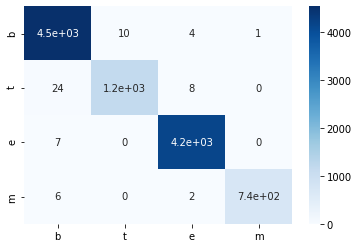

In [38]:
train_cm = confusion_matrix(train_x, train_t)
print('訓練データ')
print(train_cm)
show_cm(train_cm)

評価データ
[[498  17   7   5]
 [ 25 126   8   4]
 [ 12   6 554   0]
 [  8   5   6  55]]


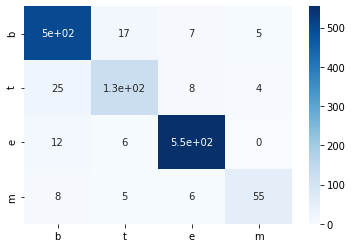

In [39]:
test_cm = confusion_matrix(test_x, test_t)
print('評価データ')
print(test_cm)
show_cm(test_cm)

56

In [40]:
tp = test_cm.diagonal()
tp

array([498, 126, 554,  55], dtype=int32)

In [41]:
fn = test_cm.sum(axis=1) - tp
fn

array([29, 37, 18, 19])

In [42]:
fp = test_cm.sum(axis=0) - tp
fp

array([45, 28, 21,  9])

In [43]:
tn = test_cm.sum() - tp - fp - fn

In [44]:
p = tp / (tp + fp)
p

array([0.91712707, 0.81818182, 0.96347826, 0.859375  ])

In [45]:
r = tp / (tp + fn)
r

array([0.94497154, 0.77300613, 0.96853147, 0.74324324])

In [46]:
F = 2 * p * r / (p + r)
F

array([0.93084112, 0.79495268, 0.96599826, 0.79710145])

[参考](https://jp.xlsoft.com/documents/intel/daal/2016/daal2016_ref/GUID-5220F4E2-3169-40D7-A3B2-CCF10C27B3FE.htm)

In [47]:
micro_p = tp.sum() / (tp+fp).sum()
micro_r = tp.sum() / (tp+fn).sum()
micro_F = 2 * micro_p * micro_r / (micro_p + micro_r)
micor_ave = np.array([micro_p, micro_r, micro_F])

In [48]:
macro_p = p.mean()
macro_r = r.mean()
macro_F = 2 * macro_p * macro_r / (macro_p + macro_r)
macro_ave = np.array([macro_p, macro_r, macro_F])

In [49]:
table = np.array([p, r, F]).T
table = np.vstack([table, micor_ave, macro_ave])
pd.DataFrame(
    table, 
    index = categories + ['マイクロ平均'] + ['マクロ平均'],
    columns= ['適合率', '再現率', 'Fスコア']        
            )

,適合率,再現率,Fスコア
b,0.917127,0.944972,0.930841
t,0.818182,0.773006,0.794953
e,0.963478,0.968531,0.965998
m,0.859375,0.743243,0.797101
マイクロ平均,0.922904,0.922904,0.922904
マクロ平均,0.889541,0.857438,0.873194


57

In [50]:
def show_weight(directional, N):
    for i, cat in enumerate(categories):
        indices = lr.coef_[i].argsort()[::directional][:N]
        best = np.array(features)[indices]
        weight = lr.coef_[i][indices]
        print(category_names[i])
        display(pd.DataFrame([best, weight], index = ['特徴量', '重み'], columns = np.arange(N) + 1))

In [51]:
show_weight(-1, 10)

business


,1,2,3,4,5,6,7,8,9,10
特徴量,bank,fed,ukrain,yellen,ecb,oil,profit,argentina,china,debt
重み,1.85733,1.61785,1.581,1.43184,1.39751,1.38267,1.37576,1.36354,1.35616,1.3226


science and technology


,1,2,3,4,5,6,7,8,9,10
特徴量,facebook,googl,climat,microsoft,appl,tesla,heartble,nasa,comcast,gm
重み,2.745,2.62854,2.24896,2.10033,2.07593,1.99358,1.80477,1.75173,1.7285,1.63164


entertainment


,1,2,3,4,5,6,7,8,9,10
特徴量,kardashian,chris,film,wed,fan,movi,music,paul,' the,spotifi
重み,1.52113,1.49892,1.45677,1.41651,1.40793,1.36273,1.18378,1.17811,1.14011,1.11668


health


,1,2,3,4,5,6,7,8,9,10
特徴量,ebola,fda,drug,cancer,brain,doctor,medic,mer,studi,cdc
重み,2.38728,1.9794,1.91538,1.88564,1.81515,1.69486,1.65754,1.60412,1.48879,1.45411


In [52]:
show_weight(1, 10)

business


,1,2,3,4,5,6,7,8,9,10
特徴量,aereo,babi,virus,victim,heartble,facebook,activis,gentiva,ebola,her
重み,-1.46044,-1.16645,-1.10052,-1.08141,-1.04876,-1.01894,-1.00267,-0.972175,-0.968773,-0.963188


science and technology


,1,2,3,4,5,6,7,8,9,10
特徴量,drug,40,percent,his,cancer,fed,spotifi,us stock,surg,to watch
重み,-0.987604,-0.896082,-0.867278,-0.832889,-0.779471,-0.759901,-0.758381,-0.717377,-0.715134,-0.692302


entertainment


,1,2,3,4,5,6,7,8,9,10
特徴量,googl,ceo,china,facebook,recal,microsoft,tesla,gm,scientist,research
重み,-1.40854,-1.1417,-1.12731,-1.12494,-1.0769,-1.06799,-1.05114,-1.04944,-1.01384,-1.00271


health


,1,2,3,4,5,6,7,8,9,10
特徴量,dimon,gm,ceo,deal,googl,bank,appl,twitter,facebook,fund
重み,-0.8652,-0.848064,-0.760794,-0.759858,-0.704551,-0.661883,-0.655943,-0.65053,-0.601121,-0.600361


58

In [57]:
%matplotlib inline
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns



plt.rcdefaults()
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [58]:
Cs = np.arange(0.1, 5.1, 0.1)
lrs = [LogisticRegression(C=C, max_iter=1000).fit(train_x, train_t) for C in tqdm(Cs)]

100%|██████████| 50/50 [20:54<00:00, 25.09s/it]


In [59]:
train_accs = [accuracy(lr, train_x, train_t) for lr in lrs]
valid_accs = [accuracy(lr, valid_x, valid_t) for lr in lrs]
test_accs = [accuracy(lr, test_x, test_t) for lr in lrs]

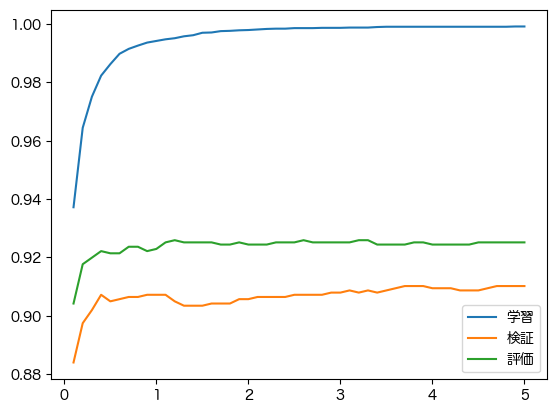

In [60]:
plt.plot(Cs, train_accs, label = '学習')
plt.plot(Cs, valid_accs, label = '検証')
plt.plot(Cs, test_accs, label = '評価')
plt.legend()
plt.show()